In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
#loading dataset
data = sm.datasets.fair.load_pandas().data
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [10]:
#creating a new col which stores if there was /wasn't an affair
data['affair'] = (data.affairs > 0).astype(int)
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


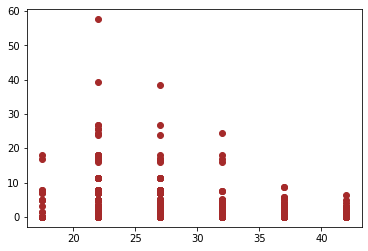

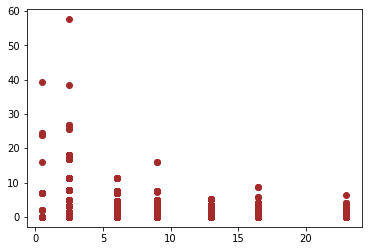

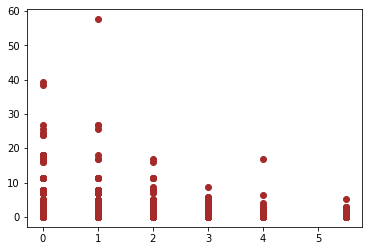

In [13]:
#EDA
data.shape
data.dtypes
data.isna
data.describe()

data.groupby('affair').mean()

plt.scatter(x=data['age'],y=data['affairs'],color="brown")
plt.show()
plt.scatter(x=data['yrs_married'],y=data['affairs'],color="brown")
plt.show()
plt.scatter(x=data['children'],y=data['affairs'],color="brown")
plt.show()

In [18]:
### Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(data,test_size = 0.3) # 30% test data

In [24]:
# Model building 
import statsmodels.formula.api as sm
logit_model = sm.logit('affair ~ yrs_married+rate_marriage+age+children+religious+educ+occupation+occupation_husb',data = train_data).fit()

Optimization terminated successfully.
         Current function value: 0.547224
         Iterations 6


In [25]:
#summary
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 affair   No. Observations:                 4456
Model:                          Logit   Df Residuals:                     4447
Method:                           MLE   Df Model:                            8
Date:                Sat, 25 Apr 2020   Pseudo R-squ.:                  0.1294
Time:                        00:26:16   Log-Likelihood:                -2438.4
converged:                       True   LL-Null:                       -2800.9
Covariance Type:            nonrobust   LLR p-value:                3.132e-151
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.7205      0.354     10.497      0.000       3.026       4.415
yrs_married         0.1097      0.013      8.361      0.000       0.084       0.135
rate_marriage      -0.6947      0.038    -18.461      0.000      -0.768      -0.621
age                -0.0630      0.012     -5.111      0.000      -0.087      -0.039
children            0.0131      0.038      0.346      0.729      -0.061       0.087
religious          -0.4000      0.042     -9.539      0.000      -0.482      -0.318
educ               -0.0278      0.018     -1.519      0.129      -0.064       0.008
occupation          0.1514      0.041      3.708      0.000       0.071       0.231
occupation_husb    -0.0128      0.027     -0.473      0.636      -0.066       0.040
===================================================================================
"""

In [38]:

predict = logit_model.predict(pd.DataFrame(test_data[['yrs_married','age','rate_marriage','children','religious','educ','occupation','occupation_husb']]))
predict

5747    0.473906
94      0.241022
4841    0.399530
1914    0.401300
6177    0.282681
          ...   
5021    0.510186
3937    0.084540
3823    0.202666
2874    0.159060
39      0.277540
Length: 1910, dtype: float64

In [31]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(test_data['affair'], predict > 0.5 )
cnf_matrix

array([[1171,  122],
       [ 389,  228]], dtype=int64)

In [32]:
accuracy = (1171+228/(1171+122+389+228))
accuracy #1171.1193717277488

1171.1193717277488

In [48]:
from sklearn.metrics import roc_curve
#roc curve
y_true = test_data['affair']
fpr,tpr, thresholds = roc_curve(y_true,predict)
fpr
tpr
thresholds

array([1.92806477, 0.92806477, 0.92106804, 0.90335187, 0.85930131,
       0.85900758, 0.84906345, 0.84816441, 0.82834293, 0.82731607,
       0.80749927, 0.80521583, 0.79606837, 0.79400149, 0.79089595,
       0.79078531, 0.78849157, 0.78345499, 0.75445905, 0.74752779,
       0.7458863 , 0.74408088, 0.73686436, 0.73601432, 0.73286332,
       0.73229564, 0.72801137, 0.72776419, 0.7255179 , 0.72442152,
       0.71017337, 0.70804209, 0.70129369, 0.70010425, 0.69684789,
       0.69153716, 0.67949505, 0.67920625, 0.67703102, 0.67670306,
       0.67635316, 0.67598335, 0.67422786, 0.67360699, 0.67202476,
       0.67196939, 0.66697529, 0.66404771, 0.66140659, 0.6610702 ,
       0.6565964 , 0.65619241, 0.65540398, 0.65442508, 0.64751114,
       0.64664074, 0.64457649, 0.6442048 , 0.63887063, 0.63752146,
       0.63738076, 0.63706466, 0.63506975, 0.63383752, 0.63303436,
       0.63244868, 0.62576981, 0.62570221, 0.6252426 , 0.6204108 ,
       0.61545583, 0.61436798, 0.61100363, 0.60843047, 0.60338